## Project ECG - step 1
Read project_ecg_step_1.pdf and 1D_Signal_Processing_Peak_Detection.ipynb

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.ndimage

Load the ECG data from ecg_data1.csv using pandas <br>
The ipynb file and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known to be 1000Hz  <br>

In [18]:
# load data from ecg_data1.csv using pandas
# Get the 'Amp' volume and convert it to a numpy array x
data = pd.read_csv('ecg_data1.csv')
data.head()

,Amp
0,2044.0
1,2044.0
2,2044.0
3,2044.0
4,2044.0


In [19]:
#check missing values
data.isnull().sum()

Amp    0
dtype: int64

In [20]:
#get the signal and convert it to numpy array
x = data['Amp'].values
type(x)

numpy.ndarray

In [21]:
#some parameters of the signal
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = x.shape[0] # total number of data points in the ECG signal x
Duration= N/fs #seconds

### Your task begins here
the outputs of your code cells should closely match thoses (figures, curves, etc) in this template

Visualize the ECG signal x

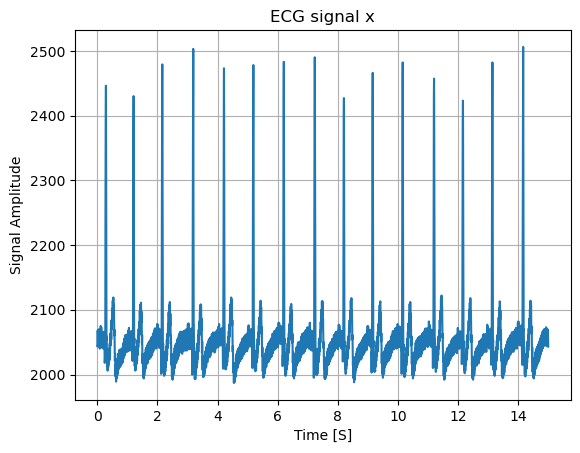

In [22]:
#code
t = np.linspace(0, Duration-Ts, N)
fig, ax = plt.subplots()
ax.plot(t,x,'-')
ax.set_xlabel('Time [S]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x')
ax.grid(True)

Build a GaussianKernel for smoothing the ECG signal x <br>
you may need to adjust the parameters of this kernel

(0.0085, 0.096)

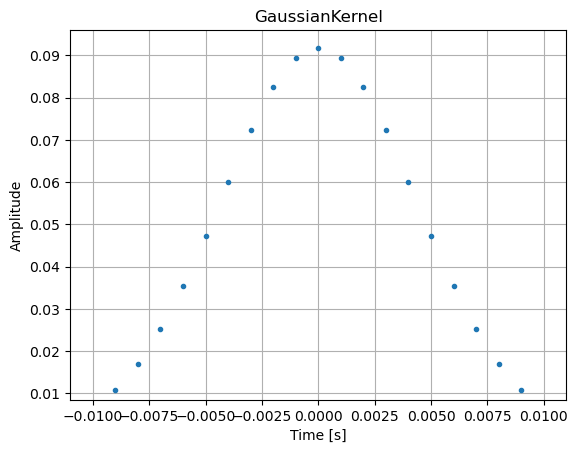

In [23]:
#code
tg = np.linspace(-0.05, .05, 100, endpoint=False) 
sigma=0.00435
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel/= (np.sum(GaussianKernel+1e-10))
#plot the kernel
fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlim([-0.011, 0.011])
ax.set_ylim([0.0085, 0.096])

Smooth the ECG signal `x` using cross-correlation (correlate) with GaussianKernel <br>
Name the smoothed signal `x_smoothed` <br>
Visualize the smoothed signal `x_smoothed` and the original signal `x` in a figure

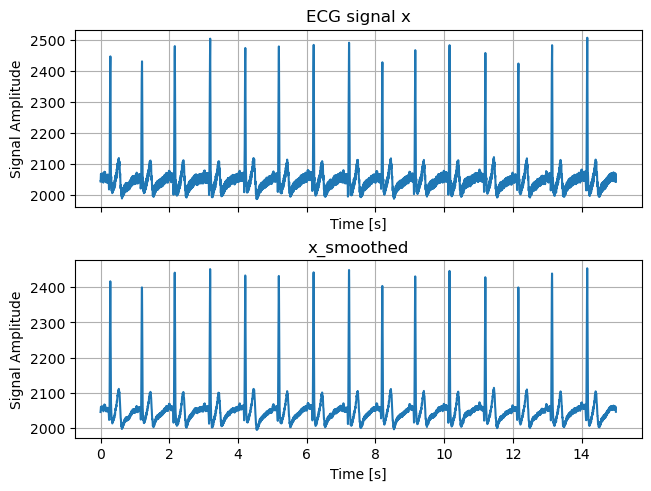

In [24]:
#code
from scipy.ndimage import correlate
x_smoothed = correlate(x, GaussianKernel, mode='nearest')
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('ECG signal x')
ax[0].grid(True)
ax[1].plot(t, x_smoothed, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_smoothed')
ax[1].grid(True)

Perform peak detection on x_smoothed, using two kernels: h1 and h2 <br>

In [25]:
#code
h1 = [-1, 1, 0] # kernel-1
h2 = [0, 1, -1] # kernel-2
y = scipy.ndimage.correlate(x_smoothed, h1, mode='nearest') 
z = scipy.ndimage.correlate(x_smoothed, h2, mode='nearest')
IndexArray1= np.where(y>0) 
IndexArray2= np.where(z>0)
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2)

Visualize the ECG signal `x` and the peaks detected from x_smoothed (no need to plot x_smoothed)

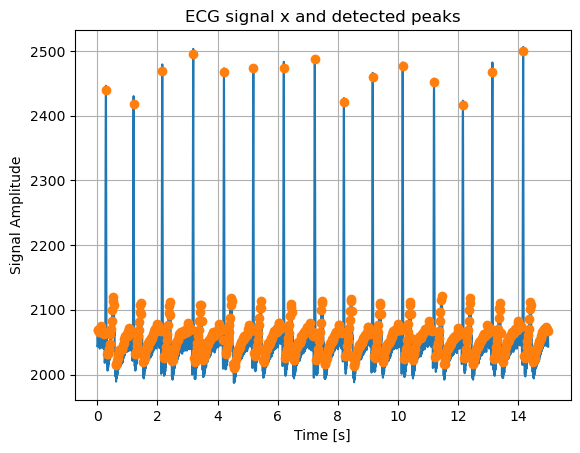

In [26]:
#code
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.plot(t[PeakIndexArray], x[PeakIndexArray], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x and detected peaks')
ax.grid(True)

We need to find the R-peaks from the detected peaks<br>
Select the peaks with amplitude values > threshold <br>
Write code to find the threshold <br>
It is NOT acceptable to simply set threshold to a manually defined number (e.g.,  threshold=2000)

In [27]:
#code

from skimage import data
from skimage.filters import threshold_otsu
ecg_signal = x
hist, bins = np.histogram(ecg_signal, bins=256, range=(0,256))

threshold = threshold_otsu(ecg_signal)

r_peak_indices = np.where(ecg_signal > threshold)[0]
RPeakIndexArray = np.intersect1d(r_peak_indices,PeakIndexArray)

Visualize the R-peaks and the signal `x`

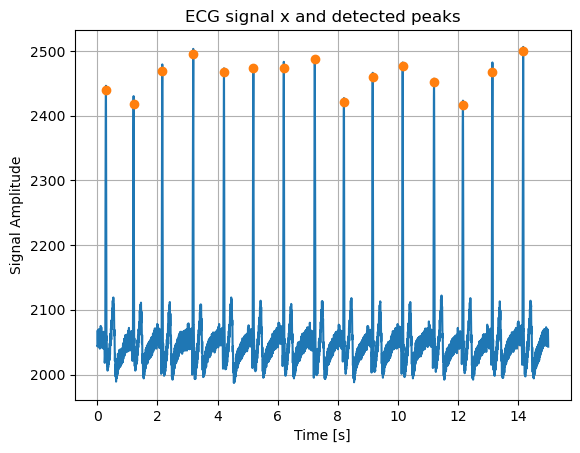

In [28]:
#code
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x and detected peaks')
ax.grid(True)

Calculate heart rate per minute based on the R-peaks and visualize the result

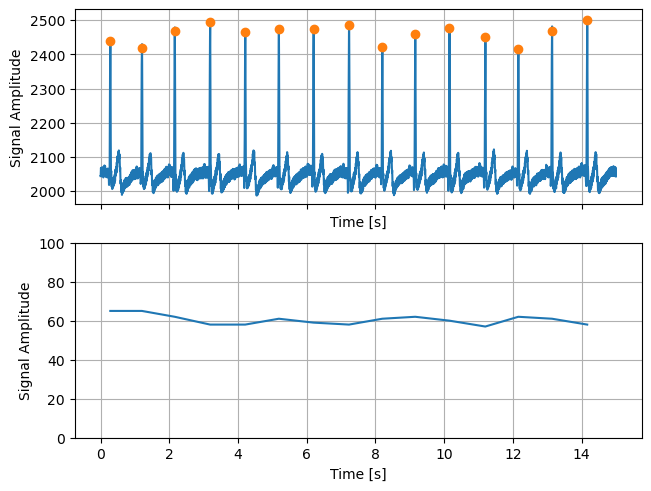

In [29]:
# RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x
# step-1: create a numpy array HeartRate that has the same shape as RPeakIndexArray

HeartRate = np.zeros_like(RPeakIndexArray)  # This will create an array of zeros with the same shape

# step-2: Calculate heart rate in a range-based for loop
# It should start from 1 because HeartRate[0] will be set to HeartRate[1] later
for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n] = 60 * fs / (RPeakIndexArray[n] - RPeakIndexArray[n - 1])

# step-3: Set HeartRate[0] to be equal to HeartRate[1]
# This must be done after the loop to avoid referencing HeartRate[1] before it has been set
HeartRate[0] = HeartRate[1]

# step-4: Plot the signal x and the HeartRate curve
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].plot(t[RPeakIndexArray], x[RPeakIndexArray], 'o')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].grid(True)
ax[1].plot(t[RPeakIndexArray], HeartRate, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_ylim([0,100])
ax[1].grid(True)